In [1]:
import numpy as np
import matplotlib.pyplot as plta ser vinculante. He aquí una contradicción moral: la mayoría silenciosa, esa
import h5py as h5
import os



In [2]:
exppath = '/media/labfiles/lab-exps/spectro-lab/nano/grating_InP/exp_22-01/exp_13_01_AFM/'
for i,files in enumerate(os.listdir(exppath)):
    print(i,files)

0 testrejilla4_micro.h5
1 rejillatest3.h5
2 testrejilla3_micro.h5
3 testrejilla3.h5
4 rejillatest2.h5


In [3]:
exps = h5.File(exppath+'rejillatest3.h5') 
dset = list(exps.keys())
exps1 = h5.File(exppath+'testrejilla3_micro.h5') 
dset1 = list(exps1.keys())

<ipython-input-3-261a4e760b83>:1: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  exps = h5.File(exppath+'rejillatest3.h5')
<ipython-input-3-261a4e760b83>:3: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  exps1 = h5.File(exppath+'testrejilla3_micro.h5')


grating micro

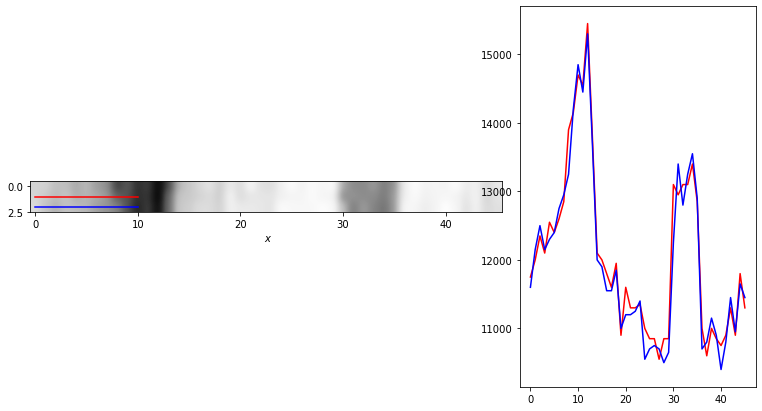

In [4]:
from mpl_toolkits.axes_grid1 import make_axes_locatable,ImageGrid
from mpl_toolkits.axes_grid1 import AxesGrid
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(13, 7))
gs = GridSpec(1, 2, figure=fig,wspace=0.05,width_ratios=[2,1])

ax1 = fig.add_subplot(gs[0, 0])
ax2 =fig.add_subplot(gs[0, 1])

npix1=1
npix2=2
#npix3=3

ax1.imshow(exps1[dset[0]][:].T,cmap='Greys',interpolation='gaussian')
ax1.plot([0,10],[npix1,npix1],'r')
ax1.plot([0,10],[npix2,npix2],'b')
#ax1.plot([0,10],[npix3,npix3],'k')


ax1.set_xlabel(" $x$")
ax2.plot(exps1[dset[0]][:,npix1],'r')
ax2.plot(exps1[dset[0]][:,npix2],'b')
#ax2.plot(exps[dset[0]][:,npix3],'k')

#plt.savefig('rejilla.png')
plt.show()

In [6]:
def CorrImag(datIm,grade,offset):

    ImRes=np.zeros(datIm.shape)

    for i in range(ImRes.shape[0]):
        datnum=np.array(datIm[i,:])
    
        x=np.arange(0,datnum.size)
        a,b =np.polyfit(x,datnum,grade)
        fit=a*x+b
        ImRes[i,:]=fit-datnum+offset
    return ImRes

In [9]:
dat=exps[dset[0]][:].T

datIm=np.array(dat)
ImRes=CorrImag(datIm,1,2000)


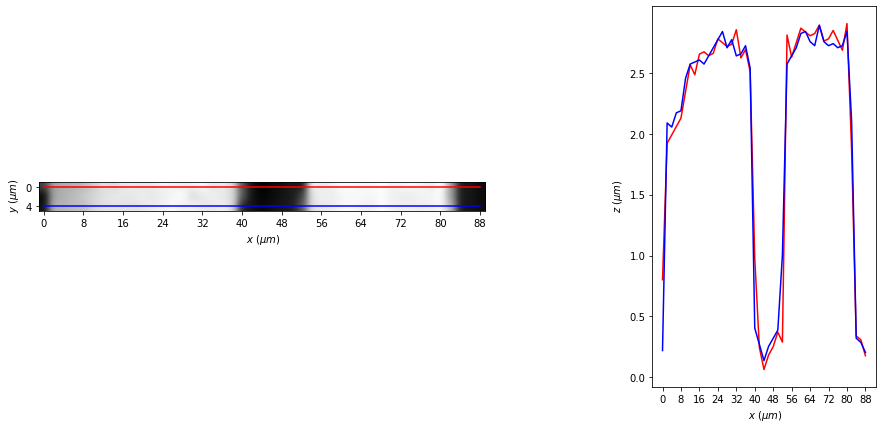

In [11]:
fig = plt.figure(figsize=(15, 7))
gs = GridSpec(1, 2, figure=fig,wspace=0.5,width_ratios=[2,1])

ax1 = fig.add_subplot(gs[0, 0])
ax2 =fig.add_subplot(gs[0, 1])

npix1=0
npix2=2
#npix3=3

ax1.imshow(ImRes[:,1:],cmap='gray',interpolation='gaussian')
ax1.plot([0,44],[npix1,npix1],'r')
ax1.plot([0,44],[npix2,npix2],'b')
#ax1.plot([0,10],[npix3,npix3],'k')


ax1.set_xlabel(" $x$ $(\mu m)$")
ax1.set_xticks(np.arange(0,45,4))
ax1.set_xticklabels(np.arange(0,90,8))
ax1.set_ylabel(" $y$ $(\mu m)$")
ax1.set_yticks(np.arange(0,4,2))
ax1.set_yticklabels(np.arange(0,8,4))

ax2.set_xlabel(" $x$ $(\mu m)$")
ax2.set_xticks(np.arange(0,45,4))
ax2.set_xticklabels(np.arange(0,90,8))
ax2.set_ylabel(" $z$ $(\mu m)$")
ax2.set_yticks(np.arange(0,3000,500))
ax2.set_yticklabels(np.arange(0,3,0.5))
ax2.plot(ImRes[npix1,1:],'r')
ax2.plot(ImRes[npix2,1:],'b')
#ax2.plot(exps[dset[0]][:,npix3],'k')

#plt.savefig('rejilla.png')
plt.show()

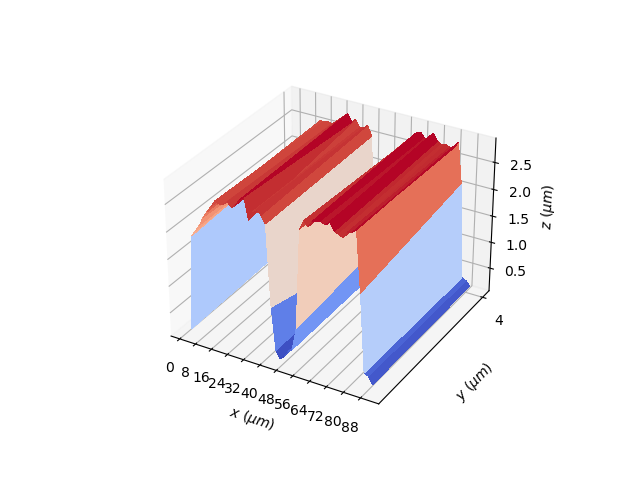

In [27]:
%matplotlib widget
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure()
fig.canvas.toolbar_visible=False
ax = fig.gca(projection='3d')
x=range(ImRes.shape[1])
y=range(ImRes.shape[0])
X,Y=np.meshgrid(x,y)

ax.set_xlabel(" $x$ $(\mu m)$")
ax.set_xticks(np.arange(0,45,4))
ax.set_xticklabels(np.arange(0,90,8))
ax.set_ylabel(" $y$ $(\mu m)$")
ax.set_yticks(np.arange(0,4,2))
ax.set_zlabel(" $z$ $(\mu m)$")
ax.set_zticks(np.arange(0,3000,500))
ax.set_zticklabels(np.arange(0,3,0.5))

ax.set_yticklabels(np.arange(0,8,4))

surf = ax.plot_surface(X[1:,1:],Y[1:,1:],ImRes[1:,1:], cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)


(3, 46)